# Categorical Word Frequencies


Within this notebook, we'll explore some text data and compile the top N most frequently occuring terms within categorical groups.

### Import dependencies

In [3]:
import pandas as pd

import math
import matplotlib.pyplot as plt
from matplotlib import gridspec

import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from utils import clean_text
import edgar
company = edgar.Company("SM Energy", "0000893538")
tree = company.getAllFilings(filingType = "10-K")

#SM_10k = (docs[0])
#test_text = SM_10k
# Expand the max width of how our dataFrames display on screen
pd.options.display.max_colwidth = 500

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yural\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#print(test_text)
docs = edgar.getDocuments(tree, noOfDocuments=2)
annual_train = docs
n_docs = 1
#train_labels = annual_train.target[:n_docs]
train_docs = annual_train[:n_docs]
train_labels = "10k"
train_df = pd.DataFrame({"body": train_docs, "category": train_labels})
train_df

,body,category
0,"\n10-K\n1\nsm-20181231x10k.htm\n10-K\n\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549FORM 10-Kþ Annual Report Pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934For the fiscal year ended December 31, 2018 oro Transition Report Pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934Commission file number 001-31539SM ENERGY COMPANY(Exact name of registrant as specified in its charter)Delaw...",10k


### Load text dataset from SKlearn's [`fetch_20newsgroups`](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)

SKlearn's [`fetch_20newsgroups`](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) is a pre-compiled dataset that (as its name entails) offers news data for 20 different categories.

In [5]:
docs = docs
# categories
cats = "10k"

# Convert to pandas DataFrame
df = pd.DataFrame({"body": docs, "category": cats})

# how many documents per category?
pd.value_counts(df['category'])

10k    2
Name: category, dtype: int64

### Use pandas `apply` to broadcast the `split` function to every row's _body_ column

Using the pandas `apply` function allows us to broadcast a function over all values of a particular column of a DataFrame (or a Series). Within the `apply` function, `lambda` is acting similar to a JavaScript arrow function. It is an abbreviated way to write a function. In the cell below, we're passing `x` as an argument and returning `x.split()`.

In [6]:
df['body_tokens'] = df['body'].apply(lambda x: x.split())
df[['body','body_tokens']].head()

,body,body_tokens
0,"\n10-K\n1\nsm-20181231x10k.htm\n10-K\n\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549FORM 10-Kþ Annual Report Pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934For the fiscal year ended December 31, 2018 oro Transition Report Pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934Commission file number 001-31539SM ENERGY COMPANY(Exact name of registrant as specified in its charter)Delaw...","[10-K, 1, sm-20181231x10k.htm, 10-K, Document, UNITED, STATESSECURITIES, AND, EXCHANGE, COMMISSIONWashington,, D.C., 20549FORM, 10-Kþ, Annual, Report, Pursuant, to, Section, 13, or, 15(d), of, the, Securities, Exchange, Act, of, 1934For, the, fiscal, year, ended, December, 31,, 2018, oro, Transition, Report, Pursuant, to, Section, 13, or, 15(d), of, the, Securities, Exchange, Act, of, 1934Commission, file, number, 001-31539SM, ENERGY, COMPANY(Exact, name, of, registrant, as, specified, in, i..."
1,"\n10-K\n1\nsm-20171231x10k.htm\n10-K\n\n\n\n\t\n\t\t\n\t\t\n\t\tDocument\n\t\n\t\nUNITED STATESSECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549FORM 10-Kþ Annual Report Pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934For the fiscal year ended December 31, 2017 oro Transition Report Pursuant to Section 13 or 15(d) of the Securities Exchange Act of 1934Commission file number 001-31539SM ENERGY COMPANY(Exact name of registrant as specified in its charter)Delaw...","[10-K, 1, sm-20171231x10k.htm, 10-K, Document, UNITED, STATESSECURITIES, AND, EXCHANGE, COMMISSIONWashington,, D.C., 20549FORM, 10-Kþ, Annual, Report, Pursuant, to, Section, 13, or, 15(d), of, the, Securities, Exchange, Act, of, 1934For, the, fiscal, year, ended, December, 31,, 2017, oro, Transition, Report, Pursuant, to, Section, 13, or, 15(d), of, the, Securities, Exchange, Act, of, 1934Commission, file, number, 001-31539SM, ENERGY, COMPANY(Exact, name, of, registrant, as, specified, in, i..."


### Group dataframe by category and combine each record's list of clean tokens

Performing a _sum_ aggregation on a column that contains lists will merge the lists into one.

In [7]:
group_df = df.groupby('category').agg({'body_tokens': 'sum'})
group_df.head()

,body_tokens
category,
10k,"[10-K, 1, sm-20181231x10k.htm, 10-K, Document, UNITED, STATESSECURITIES, AND, EXCHANGE, COMMISSIONWashington,, D.C., 20549FORM, 10-Kþ, Annual, Report, Pursuant, to, Section, 13, or, 15(d), of, the, Securities, Exchange, Act, of, 1934For, the, fiscal, year, ended, December, 31,, 2018, oro, Transition, Report, Pursuant, to, Section, 13, or, 15(d), of, the, Securities, Exchange, Act, of, 1934Commission, file, number, 001-31539SM, ENERGY, COMPANY(Exact, name, of, registrant, as, specified, in, i..."


In [8]:
len(group_df['body_tokens'][0]) #93305 just in atheism

149493

In [9]:
(group_df['body_tokens'][0])

['10-K',
 '1',
 'sm-20181231x10k.htm',
 '10-K',
 'Document',
 'UNITED',
 'STATESSECURITIES',
 'AND',
 'EXCHANGE',
 'COMMISSIONWashington,',
 'D.C.',
 '20549FORM',
 '10-Kþ',
 'Annual',
 'Report',
 'Pursuant',
 'to',
 'Section',
 '13',
 'or',
 '15(d)',
 'of',
 'the',
 'Securities',
 'Exchange',
 'Act',
 'of',
 '1934For',
 'the',
 'fiscal',
 'year',
 'ended',
 'December',
 '31,',
 '2018',
 'oro',
 'Transition',
 'Report',
 'Pursuant',
 'to',
 'Section',
 '13',
 'or',
 '15(d)',
 'of',
 'the',
 'Securities',
 'Exchange',
 'Act',
 'of',
 '1934Commission',
 'file',
 'number',
 '001-31539SM',
 'ENERGY',
 'COMPANY(Exact',
 'name',
 'of',
 'registrant',
 'as',
 'specified',
 'in',
 'its',
 'charter)Delaware(State',
 'or',
 'other',
 'jurisdiction',
 'of',
 'incorporation',
 'or',
 'organization)41-0518430(I.R.S.',
 'Employer',
 'Identification',
 'No.)1775',
 'Sherman',
 'Street,',
 'Suite',
 '1200,',
 'Denver,',
 'Colorado(Address',
 'of',
 'principal',
 'executive',
 'offices)80203(Zip',
 'Cod

### Explore the number of tokens by category

Below we're computing 3 metrics:
1. **Number of tokens** - Calculated by simply finding the length of each category's list of tokens
2. **Number of _unique_ tokens** - Calculated by first reducing the list of tokens down to unique values using the `set` function, then finding the length
3. **Lexical Diversity** - Defined as the ratio of unique terms to total terms

In [10]:
explore_df = pd.DataFrame({"Total Number of Tokens": group_df['body_tokens'].apply(lambda x: len(x)),
                        "Number of Unique Tokens": group_df['body_tokens'].apply(lambda x: len(set(x)))})

explore_df["Lexical Diversity"] = explore_df['Number of Unique Tokens'] / explore_df['Total Number of Tokens']

explore_df

,Total Number of Tokens,Number of Unique Tokens,Lexical Diversity
category,,,
10k,149493,13090,0.087563


### Plot the Lexical Diversity

Keep in mind that we don't know the origin of this data, or the number of authors that generated the underlying records, so conclusions based purely on the aggregate-level diversity scores may be skewed.

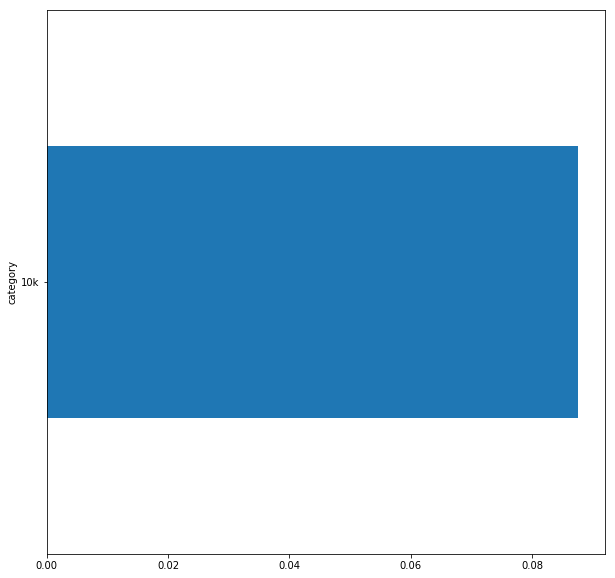

In [11]:
explore_df['Lexical Diversity'].sort_values().plot.barh(figsize=(10,10))

### Count the frequencies of each term in the word lists and return the top n most frequent

Below we're using the [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function which receives an iterable object and returns a dictionary with each unique token's frequency. Then, we're using a combination of `sorted` and `operator.itemgetter` to perform a reverse sort on a dictionary by its values, as opposed to sorting by the keys.

In [14]:
from collections import Counter
import operator
from utils import clean_text

def wordListToFreqList(wordlist, top_n=10):
    """Compile a list of all words and their frequency of occurence"""
    
    # count each term's number of occurrences
    freqDict = Counter(wordlist)
    
    # sort the frequency dictionary by its values descending and return the items as a list of tuples
    sortedFreqs = sorted(freqDict.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedFreqs[:top_n]

freqs = group_df['body_tokens'].apply(lambda x: wordListToFreqList(x))
freqs

category
10k    [(the, 6896), (of, 6376), (and, 5793), (to, 3483), (in, 2785), (our, 1931), (for, 1769), (a, 1465), (or, 1449), (on, 1339)]
Name: body_tokens, dtype: object

### Plot the most frequently occurring terms for each category

In [13]:
# Using gridspec allows us to dynamically add subplots in grid
N = len(categories)
cols = 2
rows = int(math.ceil(N / cols))
gs = gridspec.GridSpec(rows, cols)

# define the figure space for the plots
fig = plt.figure()
fig.set_figheight(N*2)
fig.set_figwidth(20)

# iterate over number of categories to plot each one's top terms
for i in range(N):
    
    # add a plot to the figure
    ax = fig.add_subplot(gs[i])
    ax.set_title(f"Most Frequent Words for: {categories[i]}", fontsize=14, fontweight='bold')
    
    # break the terms and term counts into two lists/tuples
    x,y = zip(*freqs[i])
    
    #plot the data
    ax.bar(x,y)
    
    # place numeric label on the bar
    for j, v in enumerate(y):
        ax.text(j, v/2, str(v), color='white', fontweight='bold', ha='center')
        
fig.tight_layout()

NameError: name 'categories' is not defined